# Sentiment Analysis on Twitter Data

Name:

# Preparation

## API Usage

APIs, or "application programming interface", are tools and routines used to build software applications. For example, Twitter uses and API to allow different programs and projects to access different aspects of Twitter. With some APIs, one would be able to post to Twitter, or perhaps search for different tweets (which will be used within this homework). 

To import the API package into python, we first have to run a command in command prompt. This looks as follows:

sudo pip install python-twitter

Once the package has been installed, we can begin to work with the Twitter Data!

## Public and Secret Keys

This Twitter API, along with many others, utilize public and secret keys to make sure that only validated individuals can access the API commands and functions. Plugging these into the program can validate the user and allow the API to know who is using which commands. For the most part, these APIs or companies make it pretty simply to receive their own API keys to be used for a number of processes. 

## Creating and Accessing API Keys

To create your own API Keys for Twitter Data, the steps are quite simple! While this does require a Twitter account, there is no extra information or payment necessary to access this data.

First, go to https://developer.twitter.com and sign in to your account.

Next, click on Apps and fill out the forms to the best of your ability (not all information is necessary).

Once approved, click on Keys and Tokens, and you should find your API Keys and access tokens!

# Problem 1:  Analyzing Twitter Data

We start with importing the package into the notebook or the python program.

In [22]:
import twitter

We then will then import a few other packages that will be needed throughout the homework

In [23]:
import sys
import re, string

Our next step is to plug in your API keys, which can be found from the Twitter developer website. This will give us limited access for searching tweets, mostly limiting us to the past week and occasionally restricting the amount of tweets we can pull at a time.

In [24]:
api = twitter.Api(consumer_key='AAVWqjviAWBCFLvP2kE7skkhp',
                  consumer_secret='mdOoR1YxJRl0cjQqkNhPMPINcavDp7af3PIy3wpDPy3ScuUpYF',
                  access_token_key='1338469829267738624-OBU8S3aRwDyX8IUSaehOEhahYkzyS8',
                  access_token_secret='xBxR5zcc8j3HvTcOngBoWrCguxiP4jNv61UF3v7qVBFUF',
                  sleep_on_rate_limit=True)

Your next few tasks are to implement a few functions that will pull the information from Twitter. The last task will be conducting a sentiment analysis on the data that has been pulled! As a fair warning, Twitter data can be pretty messy; your results may not be nearly as clean as the movie dataset.

In [25]:
# This function will take in a search term and run through the twitter API to find
# the most recent tweets using that search term!

def searchTerm(searchTerm):
    
    # These two variables are used to keep track of calls made to the API
    untilID = sys.maxsize
    ids = []
    processedResults = []
    

    # Create a while loop that runs as long as the length of processedResults is under 100
    while len(processedResults) < 100:
        
        # Call the getResults function, passing in the searchTerm as well as untilID
        results = getResults(searchTerm, untilID)

        # Create a loop going through each result in results. 
        #
        # Run preProcess on each result: if the returned value is not None, append the result and result.id
        # to their respective lists

        for result in results:
            preProcessReturn = preProcess(result)
            if preProcessReturn is not None:
                processedResults.append(preProcessReturn[1])
                ids.append(preProcessReturn[0])     
        
        untilID = max(ids)

    return processedResults

In [26]:
# This function will take the search term and return a list of tweet words

def getResults(searchTerm, untilID):
    
    # We will use api.GetSearch() in order to pull the Twitter data
    #
    # There are several parameters that we will need to include:
    #
    #     term: string, the term that is being searched
    #     since: string in format 'YYYY-MM-DD' which will serve as the earliest date
    #     until: string in format 'YYYY-MM-DD' which will serve as the latest data 
    #     count: int, the number of tweets to return, max of 100
    #     result_type: string, type of sorting for tweets. Typically 'recent'
    #     max_id: int, another check to limit the tweets returned. Typically sys.maxint
    #     lang: string, indication of the language being used
    #
    # You are free to change these however you wish, yet we recommend leaving lang as 'en'
    
    # CAUTION: The 'since' variable must be at most a week prior to the current date!
    #          If you would like to search further, you must apply through Twitter

    results = api.GetSearch(term=searchTerm, since='2022-11-12', until='2022-11-17', count="100",
                            result_type='recent', max_id=untilID, lang='en')

    
    return results

In [27]:
# Here we pass in a result, which is a Twitter object from python-twitter, and return the processed result!

def preProcess(result):
    
    # First make sure that the result is not a retweet (result.retweeted_status) 
    # nor a media post (result.media)
    
    if not result.retweeted_status and not result.media:

        result_body = result.text

        
        # Remove links, as well as encode for UTF-8 and remove whitespace
        result_body = re.sub(r'http\S+', '', result_body)
        result_body = result_body.strip()
        result_body.encode(encoding='UTF-8')
        
        # Deal with punctuation within the tweets, removing most (if not all) punctuation        
        # Set processedResult to all lowercase as well as split into a list of words

        processedResultVal = result_body.lower().translate(str.maketrans("", "", string.punctuation)).split(" ")
        id = result.id

        processedResult = [id, processedResultVal]
        
        print(processedResult)
        
    else:
        
        return None
        
    return processedResult

In [28]:
# Replace the string within the searchTerm function to search for new Twitter sentiment data!

data = searchTerm('racism')

[1593031096182411265, ['barbaraleija6', 'thank', 'you', 'for', 'speaking', 'out', 'silence', 'is', 'being', 'complicit', 'with', 'racism', 'it’s', 'greatly', 'appreciated']]
[1593031065798840320, ['amiraelghawaby', 'torontostar', 'shame', 'on', 'you', 'amira\n\nno', 'the', 'war', 'time', 'measurement', 'act', 'was', 'a', 'blatant', 'overreach', 'of', 'the', 'go…']]
[1593031055228796929, ['helenkennedy', 'pandering', 'plus', 'homophobia', 'and', 'racism']]
[1593031044768628736, ['nightlynews\nsomeone', 'asked', 'me', '“so', 'they', 'want', 'to', 'pass', 'laws', 'prohibiting', 'talking', 'about', 'the', 'racism', 'against', 'black', 'people…']]
[1593030972207140865, ['dingcalypse', 'yes', 'racism', '😍']]
[1593030961293590528, ['lorraineluv1', 'of', 'course', 'i', 'have', 'friends', 'who', 'are', 'of', 'the', 'christian', 'muslim', 'hindu', 'shinto', 'buddhist', 'faiths', 'and', 'athe…']]
[1593030954964381697, ['autulloaas', 'texas', 'had', 'a', 'state', 'agency', 'tackling', 'institution

**NOTE:** If the Twitter API fails to work, or for some reason users are unable to access the data, one can use data from the zipped sampleTwitterData folder to continue to work on the lab. It is important to note that there are 10 CSV files containting the tweets for 10 keywords and each CSV has over 500 tweets, yet these tweets are **not** processed! You will still need to implement and run an appropriate version of preProcess() on that data. 

Great! We now have all the data stored in our data variable. We can cycle through this data set and perform the same rule-based sentiment analysis that we saw previously in the lab.

In [29]:
# This function runs a rule-based sentiment analysis on a given entry

def analyzeSentiment(entry):
    
    # Set the score to zero, then loop through each word in the entry
    # At each word, add one to the score if it is in positive_words, subtract one if it is in negative_words
    # or do nothing if it is in neither!
    
    score = 0
    for val in entry:
        if val in positive_words:
            score = score + 1
        if val in negative_words:
            score = score - 1
        
    return "Positive" if score >= 0 else "Negative"

In [30]:
# Don't touch this code! For setup purposes only

sentiments = []

global negative_words
global positive_words

with open('utility/data/negative-words.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('utility/data/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
    
for entry in data:
    
    sentiments.append(analyzeSentiment(entry))

In [31]:
print(sentiments)

['Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Ne

# Problem 2: Understanding the Results
## Visualizing the Results

The final step is creating a few simple charts to look at the overall sentiment of the current Twitter search.

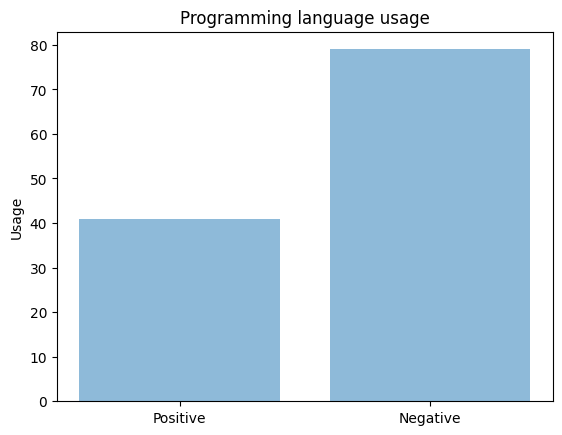

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
positive = sum([1 for x in sentiments if x == 'Positive'])
negative = sum([1 for x in sentiments if x == 'Negative'])
performance = [positive, negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

## Further Visualization

For a slightly more colorful view at the overall data, we can use a wordcloud module!

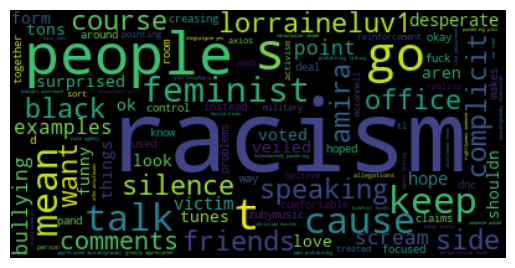

In [33]:
from wordcloud import WordCloud
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

overallWords = ' '

for entry in data:
    for word in entry:
        overallWords += word + ' '

wordcloud = WordCloud().generate(overallWords)

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

After looking at the two graphs, there are many things that can be seen after analyzing Twitter data. Fill in the markdown box below with some of your findings. A few questions have been provided as examples.

- What was the overall sentiment?

- What were some of the words that were used the most (larger = more common)?

- Why do you think this is?

- Do you believe this would be different during different weeks?

**Answer:**

The overall sentiment was definitely more negative than positive. From the graph we can see that the negative sentiment is way more than the positive sentiment when it comes to 'racism'. We observe that the negative sentiment is almost twice than the positive sentiment that exists. The negative sentiment (which is in majority) would be contributed mostly due to people's attitude/feeling towards racism wherein they consider it to be a bad behavior, obviously. The postive sentiment would be mostly contributed, in my opinion, by tweets related to positve movements to improve equality and diversity by removing racism.

Words used the most are racism, people, feminist, talk, mean, solution. This is because now a days, there are a lot of activists who are coming up and fighting against 'racism'. In the era where equality is one of the main focus, we have 'people' coming over from all segments discussing 'solutions' to fight this racism and tweeting about them. Especially since the last few years, we have been having several movements where people address and 'talk' on this subject matter of racism to spread awareness. Hence, we see the words like 'talk' and 'solution' enlarged. Racisim is considered negatively and an unruly behavior as it brings about discrimination. That is why we see the word 'mean' also as an enlardged word because generally people who are racists will come under this category. We also see the word 'feminist' enlarged because in intersectional theory, which emphasizes how sexism and racism are both experienced by women in the Western world, feminism and racism are typically seen as deeply entwined ideas.

Well, this would definitely be different in different weeks unless and until there are no new tweets on topics related to racism. With everyday passing by, people's attitudes and way of thinking changes and there is no certainty of the feelings of the mass population. There can be some incidents of racism that gain popularization in some of the weeks, during which the sentiments expressed might be stronger and we may see harsher words in the word cloud. Sometimes there may be huge movements organsied for public awareness of racisim wherein the word cloud may be filled with words on the lines of equality and diversity. Depending on the content of the tweets posted in a different week, the word cloud will change and will be shapped with different words.

From the first graph, we can clearly observe the negative sentimet of the people that they have when it comes to racism and how much it is looked down upon by them. By just looking at the word cloud in the second graph, we get at least a basic understanding of what the people around us believe/think about a particular topic (in our case- racism). It is also not surprising to see the words 'black', 'bullying' to see as part of the word cloud because these are the topics that are generally talked under the 'racism' umbrella.